# Proyek Analisis Data: Air-quality-dataset

- Nama: Farhan Akhtar Gymnasiar
- Email: farhan.ag26@gmail.com
- Id Dicoding: farhanage26

## Pertanyaan Bisnis (Pertanyaan Analisis)

1. Bagaimana perkembangan kondisi udara tiap tahunnya untuk masing-masing station?
2. Station mana yang memiliki kondisi udara terbaik dari tahun 2013-2017?

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
Aotizhongxin_df = pd.read_csv("PRSA Data\PRSA_Data_Aotizhongxin_20130301-20170228.csv")
Aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [3]:
Aotizhongxin_df.shape

(35064, 18)

In [4]:
Changping_df = pd.read_csv("PRSA Data\PRSA_Data_Changping_20130301-20170228.csv")
Changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [5]:
Changping_df.shape

(35064, 18)

Karena kolom-kolom tabel bersesuaian dan nama masing-masing station tercantum pada tiap dataframe, maka tidak menjadi masalah untuk menyatukan seluruh file data menjadi 1  file .csv

In [6]:
station_list = ['Changping','Dingling','Dongsi','Guanyuan','Gucheng',
                'Huairou','Nongzhanguan','Shunyi','Tiantan','Wanliu','Wanshouxigong']

df = Aotizhongxin_df

for stations in station_list:
    df = pd.concat([df,pd.read_csv(f"PRSA Data\PRSA_Data_{stations}_20130301-20170228.csv")],
               axis=0, 
               ignore_index=True)
    

In [7]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [8]:
df.shape

(420768, 18)

Total terdapat 420.768 observasi dengan 18 variabel

### Assessing Data

In [9]:
df.set_index('No', inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420768 entries, 1 to 35064
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 57.8+ MB


In [11]:
df.isna().sum()

year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Karena jumlah missing value pada data cukup banyak, akan lebih mudah untuk menyajikan nilai missing values dalam persentase

In [12]:
df.isna().mean()*100


year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.076916
PM10       1.532674
SO2        2.143937
NO2        2.879497
CO         4.919813
O3         3.155421
TEMP       0.094589
PRES       0.093401
DEWP       0.095777
RAIN       0.092688
wd         0.433018
WSPM       0.075576
station    0.000000
dtype: float64

Kolom CO memiliki persentase missing values terbesar (&approx;5%)

In [13]:
print("Jumlah duplikasi:", df.duplicated().sum())

Jumlah duplikasi: 0


Tidak terdapat data duplikat

In [14]:
df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Secara umum tidak terlihat inaccurate values pada data

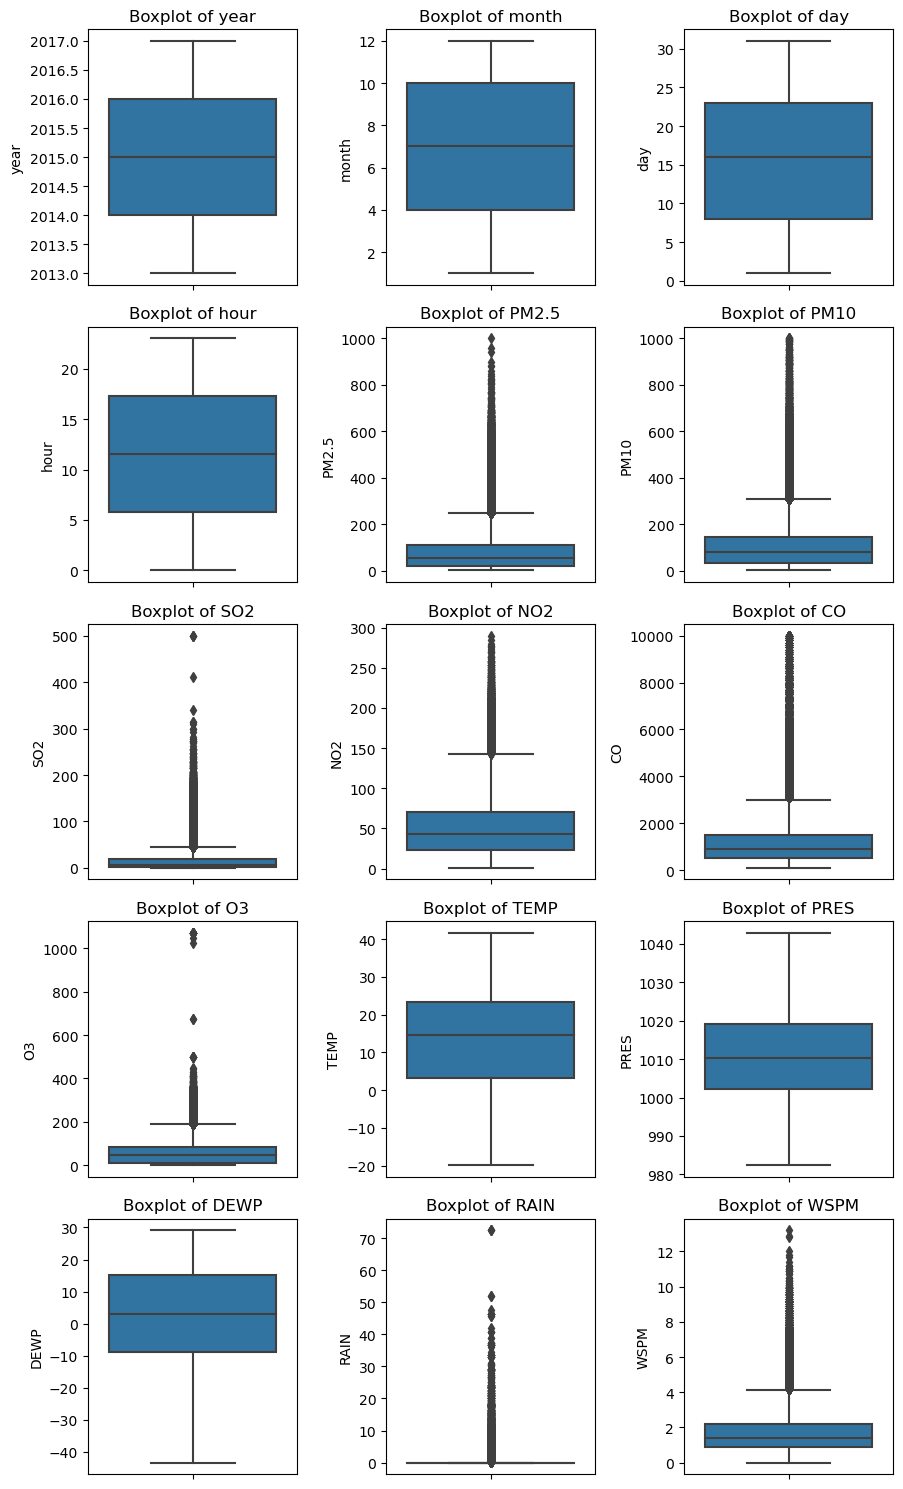

In [15]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

n = len(numeric_cols)
ncols = 3
nrows = n // ncols if n % ncols == 0 else n // ncols + 1

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*3))

for ax, column in zip(axs.flatten(), numeric_cols):
    sns.boxplot(y=df[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

dengan menggunakan boxplot, terlihat kolom PM2.5, PM10, SO2, NO2, CO, O3,, RAIN dan WSPM memiliki jumlah outlier yang cukup besar. <br>
Lebih lanjut akan dilihat persentase outlier dari tiap kolom dengan metode IQR:

In [16]:
for column in numeric_cols:    
    Q3 = df[column].quantile(0.75)
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    threshold = Q3 + 1.5 * IQR

    count = df[df[column] > threshold].shape[0]
    percentage = count / df.shape[0] * 100
    print(f"{column} outlier percentage: {percentage}%")

year outlier percentage: 0.0%
month outlier percentage: 0.0%
day outlier percentage: 0.0%
hour outlier percentage: 0.0%
PM2.5 outlier percentage: 4.549300327021067%
PM10 outlier percentage: 3.4836299338352728%
SO2 outlier percentage: 8.452638983953152%
NO2 outlier percentage: 1.6686154840672294%
CO outlier percentage: 6.667332116510762%
O3 outlier percentage: 3.944929272187999%
TEMP outlier percentage: 0.0%
PRES outlier percentage: 0.0%
DEWP outlier percentage: 0.0%
RAIN outlier percentage: 3.9261540801581867%
WSPM outlier percentage: 5.484970339949806%


Terlihat bahwa kolom SO2, CO, dan WSPM memiliki persentase outlier yang cukup besar (>5%), sehingga untuk kolom-kolom tersebut akan dilakukan imputasi agar kita tidak kehilangan terlalu banyak informasi pada data

Selain 3 kolom tersebut, observasi outlier akan didrop

### Cleaning Data

Menangani missing values

In [17]:
df[df.CO.isna()]

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
No,,,,,,,,,,,,,,,,,
76,2013,3,4,3,12.0,34.0,6.0000,12.0000,NaN,77.0,7.2,1016.9,-11.6,0.0,N,2.8,Aotizhongxin
125,2013,3,6,4,192.0,203.0,83.6808,140.4252,NaN,22.0,3.9,1007.3,-6.1,0.0,NE,1.4,Aotizhongxin
172,2013,3,8,3,324.0,373.0,71.0000,154.0000,NaN,84.0,1.8,997.9,-1.8,0.0,N,0.0,Aotizhongxin
179,2013,3,8,10,326.0,844.0,125.9496,179.2269,NaN,84.0,19.1,1000.9,-0.4,0.0,SSW,1.9,Aotizhongxin
268,2013,3,12,3,117.0,127.0,73.0000,81.0000,NaN,47.0,6.4,1005.8,-1.0,0.1,N,2.2,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35006,2017,2,26,13,NaN,NaN,NaN,NaN,NaN,NaN,12.4,1020.0,-8.2,0.0,NW,1.2,Wanshouxigong
35028,2017,2,27,11,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1018.3,-5.6,0.0,ESE,1.4,Wanshouxigong
35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Wanshouxigong


Karena masih terdapat banyak informasi penting, digunakan metode *imputation*.

In [18]:
df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


Untuk missing values pada kolom PM2.5, PM10, SO2, NO2, CO, O3, RAIN, dan WSPM, karena terdapat outlier pada data, maka akan digunakan median dari masing-masing kolom untuk mengisi missing values kolom-kolom yang bersesuaian

In [19]:
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)
df['PM10'].fillna(df['PM10'].median(), inplace=True)
df['SO2'].fillna(df['SO2'].median(), inplace=True)
df['NO2'].fillna(df['NO2'].median(), inplace=True)
df['CO'].fillna(df['CO'].median(), inplace=True)
df['O3'].fillna(df['O3'].median(), inplace=True)
df['RAIN'].fillna(df['RAIN'].median(), inplace=True)
df['WSPM'].fillna(df['WSPM'].median(), inplace=True)    

Untuk kolom TEMP, PRES dan DEWP, digunakan mean untuk mengisi missing values masing-masing kolom yang bersesuaian

In [20]:
df['TEMP'].fillna(df['TEMP'].mean(), inplace=True)
df['PRES'].fillna(df['PRES'].mean(), inplace=True)
df['DEWP'].fillna(df['DEWP'].mean(), inplace=True)

In [21]:
df.wd.value_counts()

NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: wd, dtype: int64

Missing values pada kolom wd akan diisi dengan modus dari kolom wd, yaitu NE

In [22]:
df.wd.fillna(value='NE', inplace=True)

In [23]:
df.isna().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Menangani Outlier

In [24]:
for col in [col for col in numeric_cols if col not in ['SO2', 'CO', 'WSPM', 'RAIN']]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - 1.5 * IQR
    maximum = Q3 + 1.5 * IQR

    kondisi_lower_than = df[col] < minimum
    kondisi_more_than = df[col] > maximum
 
    df.drop(df[kondisi_lower_than].index, inplace=True)
    df.drop(df[kondisi_more_than].index, inplace=True)

In [25]:
for col in [col for col in numeric_cols if col in ['SO2', 'CO', 'WSPM']]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - 1.5 * IQR
    maximum = Q3 + 1.5 * IQR

    kondisi_lower_than = df[col] < minimum
    kondisi_more_than = df[col] > maximum
 
    df.loc[kondisi_more_than, col] = maximum
    df.loc[kondisi_lower_than, col] = minimum

Selanjutnya dilakukan penyatuan kolom 'year', 'month', 'day' dan 'hour' sebagai satu kolom 'timestamp' dengan format datetime untuk memudahkan proses analisis

In [26]:
df['timestamp'] = pd.to_datetime(df[['year','month','day','hour']])
df.drop(['year','month','day','hour'], axis=1, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305172 entries, 1 to 35064
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   PM2.5      305172 non-null  float64       
 1   PM10       305172 non-null  float64       
 2   SO2        305172 non-null  float64       
 3   NO2        305172 non-null  float64       
 4   CO         305172 non-null  float64       
 5   O3         305172 non-null  float64       
 6   TEMP       305172 non-null  float64       
 7   PRES       305172 non-null  float64       
 8   DEWP       305172 non-null  float64       
 9   RAIN       305172 non-null  float64       
 10  wd         305172 non-null  object        
 11  WSPM       305172 non-null  float64       
 12  station    305172 non-null  object        
 13  timestamp  305172 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 34.9+ MB


Set kolom 'No' sebagai index, karena kolom tersebut berisi nomor observasi

## Exploratory Data Analysis (EDA)

Descriptive Statistics untuk kolom-kolom numerik

In [28]:
df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,305172.000000,305172.000000,305172.000000,305172.000000,305172.000000,305172.000000,305172.000000,305172.000000,305172.000000,305172.000000,305172.000000
mean,51.997954,71.868358,9.841004,42.313144,889.754289,50.212580,13.130048,1011.460516,1.542108,0.074676,1.745715
std,45.054322,52.631459,9.717887,25.748589,589.705284,38.824053,11.031482,10.636503,14.398918,0.841085,1.120232
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,15.000000,27.000000,2.000000,21.000000,400.000000,16.000000,3.200000,1002.800000,-11.300000,0.000000,0.900000
50%,39.000000,61.000000,6.000000,40.000000,800.000000,45.000000,14.500000,1011.000000,2.100000,0.000000,1.500000
75%,76.000000,106.000000,14.000000,60.000000,1200.000000,74.000000,22.500000,1020.000000,15.200000,0.000000,2.300000
max,241.000000,260.000000,32.000000,121.000000,2400.000000,184.000000,38.200000,1042.800000,28.700000,52.100000,4.400000


Gas pencemar kualitas udara terbesar adalah gas **CO**

### Visualization & Explanatory Analysis

#### Bagaimana perkembangan kondisi udara tiap tahunnya untuk masing-masing station?

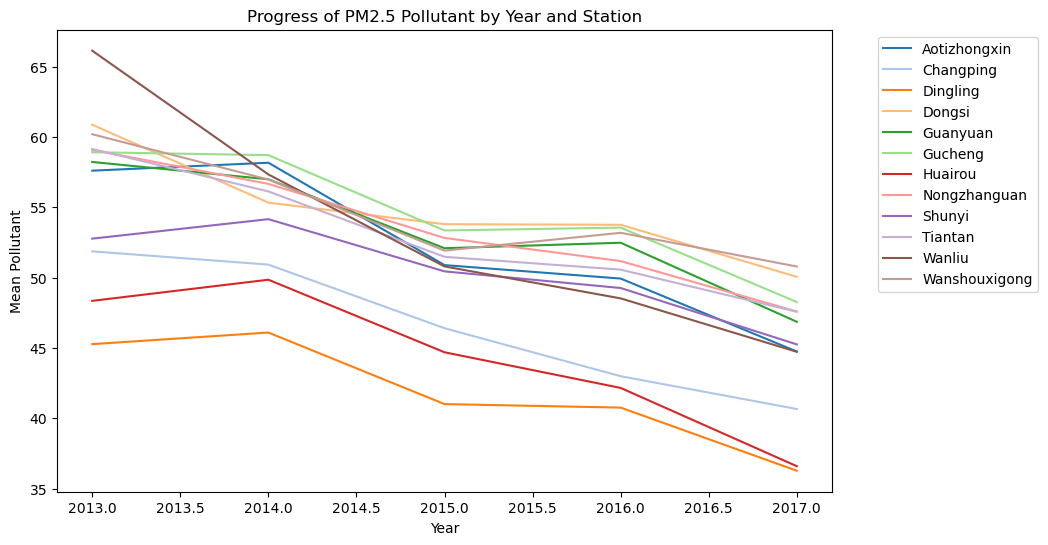

In [29]:
df['year'] = df['timestamp'].dt.year
colors = plt.cm.tab20.colors

df.groupby(['year', 'station'])['PM2.5'].mean().unstack().plot(figsize=(10, 6), color=colors)
plt.xlabel('Year')
plt.ylabel('Mean Pollutant')
plt.title('Progress of PM2.5 Pollutant by Year and Station')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Rata-rata polutan PM2.5 mengalami penurunan dari tahun 2013-2017 untuk tiap station. 
- Secara keseluruhan, station Dingling memiliki rata-rata PM2.5 terendah tiap tahunnya.

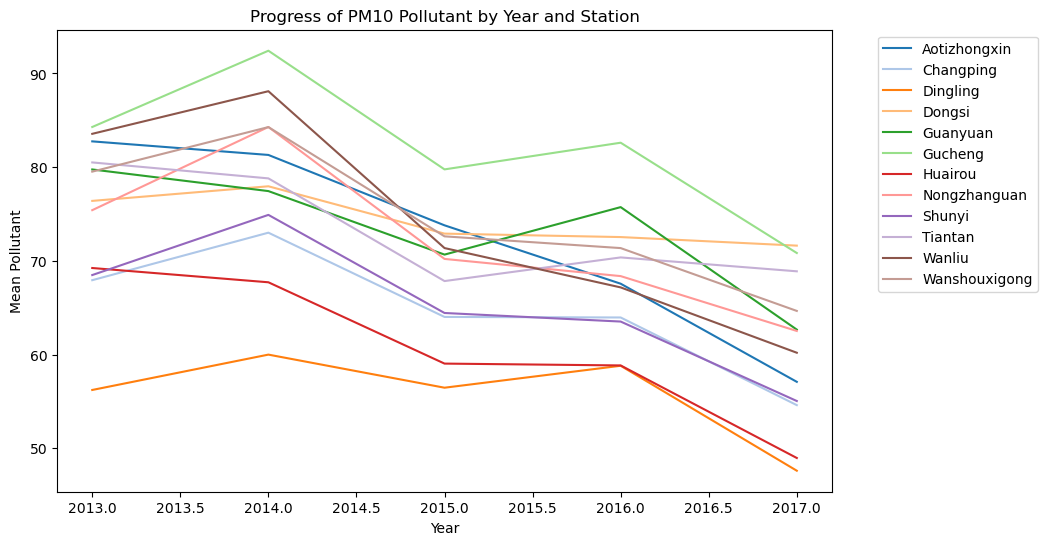

In [30]:
df.groupby(['year', 'station'])['PM10'].mean().unstack().plot(figsize=(10, 6), color=colors)
plt.xlabel('Year')
plt.ylabel('Mean Pollutant')
plt.title('Progress of PM10 Pollutant by Year and Station')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Rata-rata polutan PM10 mengalami penurunan dari tahun 2013-2017 untuk tiap station. 
- Secara keseluruhan, station Dingling memiliki rata-rata PM10 terendah tiap tahunnya.

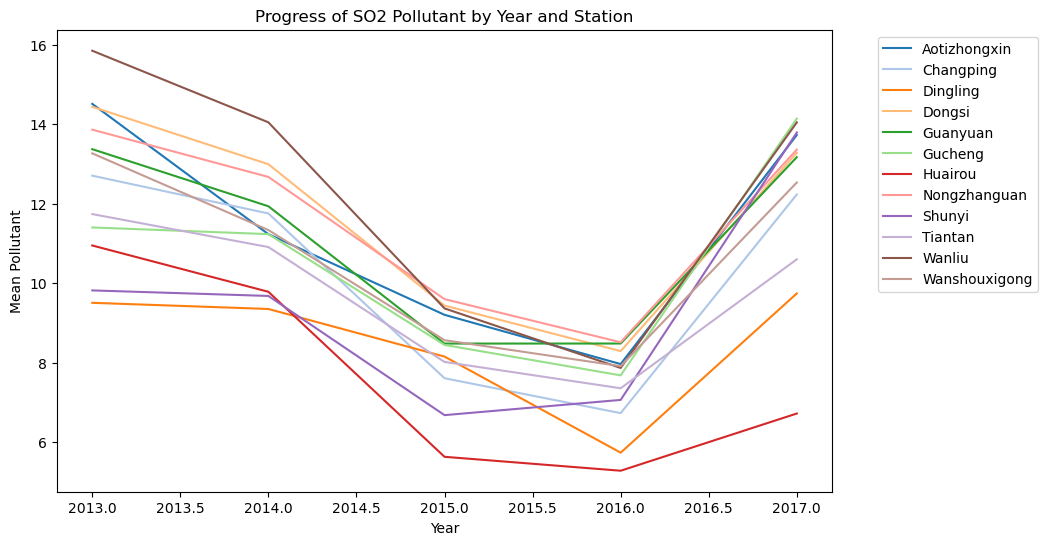

In [31]:
df.groupby(['year', 'station'])['SO2'].mean().unstack().plot(figsize=(10, 6), color=colors)
plt.xlabel('Year')
plt.ylabel('Mean Pollutant')
plt.title('Progress of SO2 Pollutant by Year and Station')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Rata-rata polutan SO2 mengalami penurunan dari tahun 2013-2016 untuk tiap station, tetapi terjadi kenaikan yang cukup drastis pada tahun 2016-2017.

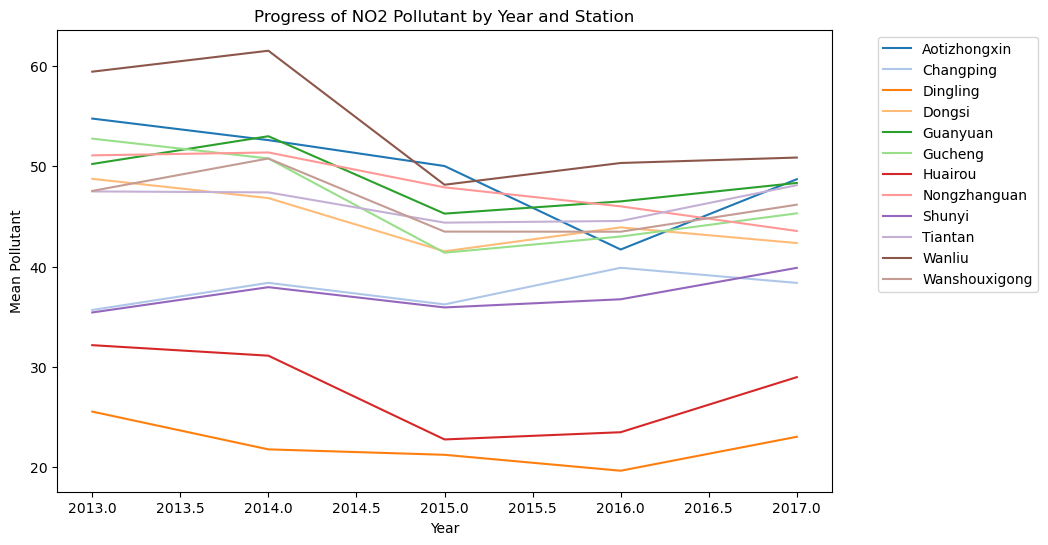

In [32]:
df.groupby(['year', 'station'])['NO2'].mean().unstack().plot(figsize=(10, 6), color=colors)
plt.xlabel('Year')
plt.ylabel('Mean Pollutant')
plt.title('Progress of NO2 Pollutant by Year and Station')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Rata-rata polutan NO2 cenderung stagnan dari tahun 2013-2017 untuk tiap station. 
- Secara keseluruhan, station Dingling memiliki rata-rata NO2 terendah tiap tahunnya.

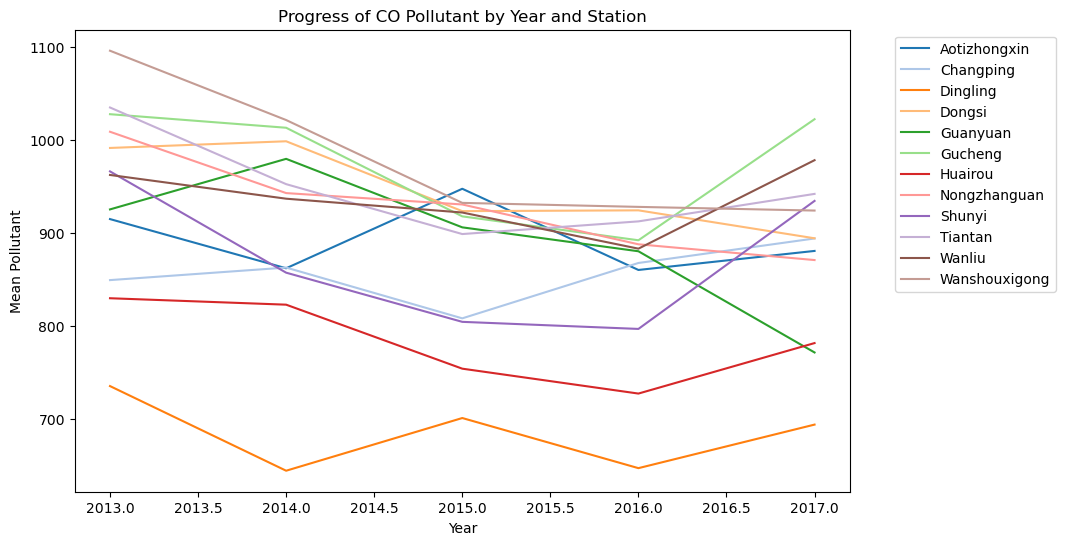

In [33]:
df.groupby(['year', 'station'])['CO'].mean().unstack().plot(figsize=(10, 6), color=colors)
plt.xlabel('Year')
plt.ylabel('Mean Pollutant')
plt.title('Progress of CO Pollutant by Year and Station')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Rata-rata polutan CO cenderung stagnan dari tahun 2013-2017 untuk tiap station selain station Wanshouxigong dan Guanyuan yang mengalami penurunan. 
- Secara keseluruhan, station Dingling memiliki rata-rata CO terendah tiap tahunnya.

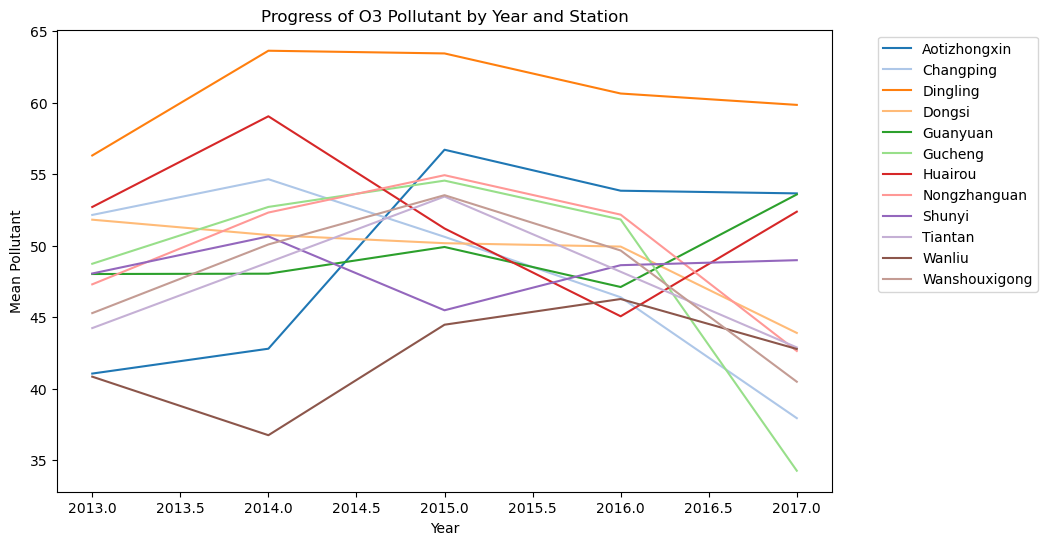

In [34]:
df.groupby(['year', 'station'])['O3'].mean().unstack().plot(figsize=(10, 6), color=colors)
plt.xlabel('Year')
plt.ylabel('Mean Pollutant')
plt.title('Progress of O3 Pollutant by Year and Station')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Rata-rata polutan O3 mengalami penurunan dari tahun 2013-2017 untuk station Gucheng, Wanshouxigong, Tiantan, Dongsi, Nongzhanguan dan Changping.
- Rata-rata polutan O3 mengalami peningkatan dari tahun 2013-2017 untuk station Dingling, Aotizhongxin, Wanliu dan Guanyuan.
- Secara keseluruhan, station Dingling memiliki rata-rata O3 tertinggi tiap tahunnya.

#### Station mana yang memiliki kondisi udara terbaik dan terburuk dari tahun 2013-2017?

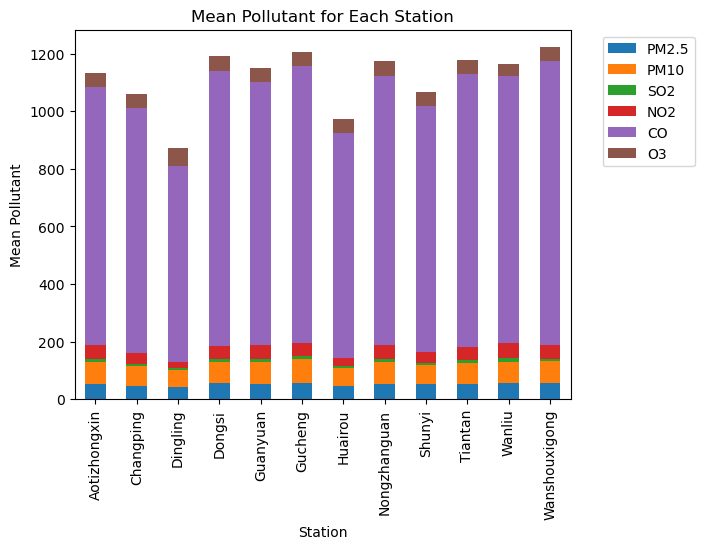

In [35]:
pollutant = ['PM2.5','PM10','SO2','NO2','CO','O3']
df.groupby('station')[pollutant].mean().plot.bar(stacked=True)
plt.xlabel('Station')
plt.ylabel('Mean Pollutant')
plt.title('Mean Pollutant for Each Station')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Untuk setiap station, gas pencemar udara dengan rata-rata terbesar adalah CO
- Station Dingling memiliki total rata-rata gas pencemar udara **terkecil** dibanding station-station lainnya
- Station Wanshouxigong memiliki total rata-rata gas pencemar udara **terbesar** dibanding station-station lainnya

### Conclusion

- Untuk semua station, rata-rata polutan PM2.5 dan PM10 selama 2013-2017 mengalami penurunan.
- Untuk semua station, rata-rata polutan SO2 selama tahun 2016-2017 mengalami kenaikan yang cukup drastis.
- Untuk hampir semua station, belum ada perubahan rata-rata polutan NO2 dan CO.
- Rata-rata polutan O3 masih sangat bervariasi antar station.
- Station dengan kondisi udara terbaik dari tahun 2013-2017 adalah station Dingling
- Station dengan kondisi udara terburuk dari tahun 2013-2017 adalah station Wanshouxigong

In [38]:
df.to_csv("main_data.csv", index=False)